In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"food_coded.csv")


In [3]:
features = data[['cook','eating_out','employment','ethnic_food','exercise','fav_cuisine_coded','fruit_day','income','on_off_campus','sports','pay_meal_out','veggies_day']]
features.head()

,cook,eating_out,employment,ethnic_food,exercise,fav_cuisine_coded,fruit_day,income,on_off_campus,sports,pay_meal_out,veggies_day
0,2.0,3,3.0,1,1.0,3,5,5.0,1.0,1.0,2,5
1,3.0,2,2.0,4,1.0,1,4,4.0,1.0,1.0,4,4
2,1.0,2,3.0,5,2.0,1,5,6.0,2.0,2.0,3,5
3,2.0,2,3.0,5,3.0,3,4,6.0,1.0,2.0,2,3
4,1.0,2,2.0,4,1.0,1,4,6.0,1.0,1.0,4,4


# CLEANING THE DATASET

In [4]:
#checking whether there are any duplicates
duplicates = features[features.duplicated()]
duplicates
#from the output, it is clear that there are no duplicate rows

,cook,eating_out,employment,ethnic_food,exercise,fav_cuisine_coded,fruit_day,income,on_off_campus,sports,pay_meal_out,veggies_day


In [5]:
#checking for null and missing values
#notnull method returns a dataframe of boolean values
#True --> No null values. False --> null values are there
check_na = features.dropna(axis=0, how='any')
print('There are' ,(len(features) - len(check_na)), 'rows with atleast one column value having a null value.')

There are 25 rows with atleast one column value having a null value.


In [6]:
#Let us remove the null values from the original dataset
features.dropna(axis=0, how='any', inplace=True)
len(features)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13952\3150841916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(axis=0, how='any', inplace=True)


100

# VISUALIZING THE DATASET

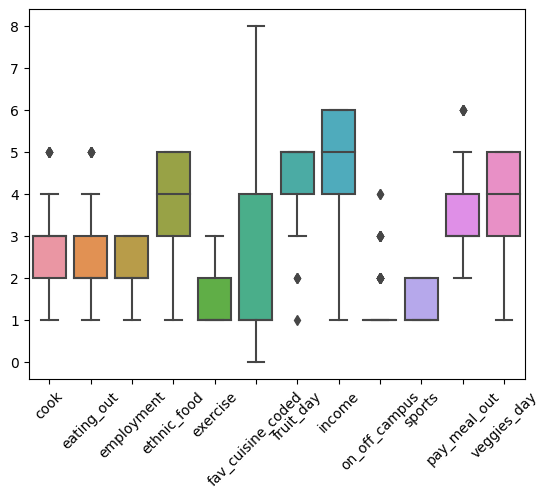

In [7]:
#plotting the dataset in the form of a boxplot
ax=sns.boxplot(data=features)
ax.set_xticklabels(features,rotation=45)
plt.show()

# BUILDING THE KMEANS MODEL FOR THE CODEBOOK DATASET

In [8]:
from sklearn.cluster import KMeans

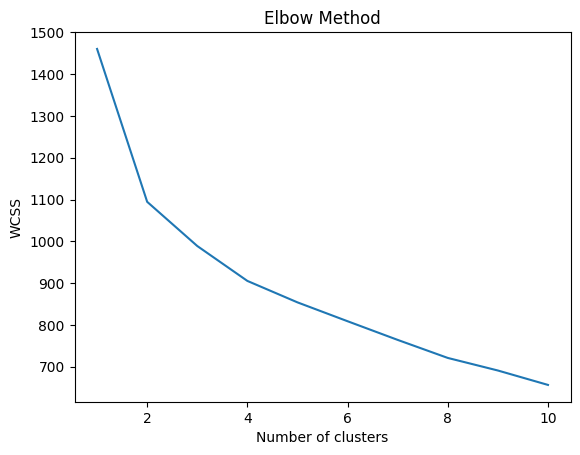

In [9]:
wcss = []
for i in range(1,11):
    Classifier = KMeans(n_clusters=i)
    Classifier.fit(features)
    wcss.append(Classifier.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the Graph, it seems K=8 might be optimal

In [10]:
Classifier = KMeans(n_clusters=6).fit(features)
y_pred = Classifier.fit_predict(features)

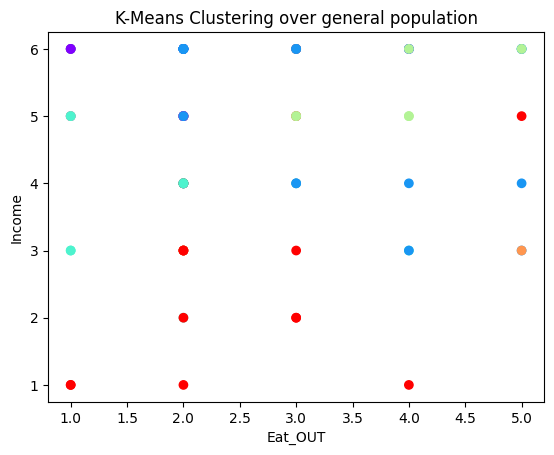

In [11]:
plt.scatter(features['eating_out'], features['income'], c=y_pred, cmap='rainbow')
plt.title('K-Means Clustering over general population')
plt.ylabel('Income')
plt.xlabel('Eat_OUT')
plt.show()